<a href="https://colab.research.google.com/github/eunseo990903/chloe/blob/main/0628_%EC%B5%9C%EC%8B%A0_%EC%BB%A8%EB%B8%8C%EB%84%B7_%EC%95%84%ED%82%A4%ED%85%8D%EC%B2%98_%ED%8C%A8%ED%84%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필터 개수가 변경되는 잔차블록

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
residual = x
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x) #잔차블록에 해당, 출력필터 32 -> 64 증가 , 패딩으로 인해 다운샘플링되지 않도록 padding ='same'
residual = layers.Conv2D(64, 1)(residual)
x = layers.add([x, residual])

최대 풀링을 가진 잔차 블록

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
residual = x
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
residual = layers.Conv2D(64, 1, strides=2)(residual)
x = layers.add([x, residual])

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 32)   896         ['rescaling[0][0]']              
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 32)   9248        ['conv2d_6[0][0]']               
                                                                                              

In [ ]:
x= layers.Conv2D(32,3,use_bias =False)(x)
x= layers.BatchNormalization()(x)
x=layers.Activation('relu')(x)

ValueError: ignored

Convnet 해석
https://github.com/rickiepark/deep-learning-with-python-2nd/blob/main/chapter09_part03_interpreting-what-convnets-learn.ipynb

In [ ]:
!wget https://github.com/rickiepark/deep-learning-with-python-2nd/raw/main/convnet_from_scratch_with_augmentation.keras


--2023-06-28 01:58:59--  https://github.com/rickiepark/deep-learning-with-python-2nd/raw/main/convnet_from_scratch_with_augmentation.keras
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/deep-learning-with-python-2nd/main/convnet_from_scratch_with_augmentation.keras [following]
--2023-06-28 01:58:59--  https://raw.githubusercontent.com/rickiepark/deep-learning-with-python-2nd/main/convnet_from_scratch_with_augmentation.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7994528 (7.6M) [application/octet-stream]
Saving to: ‘convnet_from_scratch_with_augmentation.keras’

convnet_from_

In [ ]:
from tensorflow import keras
model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
#한 개의 이미지 전처리하기

from tensorflow import keras
import numpy as np

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg") #테스트 이미지 내려받기

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img) #이미지 (180,180,3)크기의 float numpy 변환  변환
    array = np.expand_dims(array, axis=0)#배열을 단일이미지의 배치로 변환하기위해 차원추가 (1,180,180,3)
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

80329/80329 [==============================] - 0s 1us/step


In [ ]:
img_tensor[0].shape

(180, 180, 3)

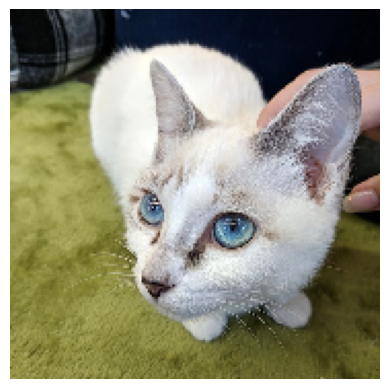

In [ ]:
#테스트 이미지 출력하기

import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [ ]:
#층 활성화를 반환하는 모델 만들기

from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)): #모든 conv2d, maxpooling 출력 하나의 리스트로 추가
        layer_outputs.append(layer.output)
        layer_names.append(layer.name) #층이름 저장
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs) #모델 입력이 주어지면 층출력 반환

#이 모델은 하나입력과 활성화층마다 하나씩 출력 - 총 9개 출력

#층 활성화 계산하기
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 1s 522ms/step


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 178, 178, 32)


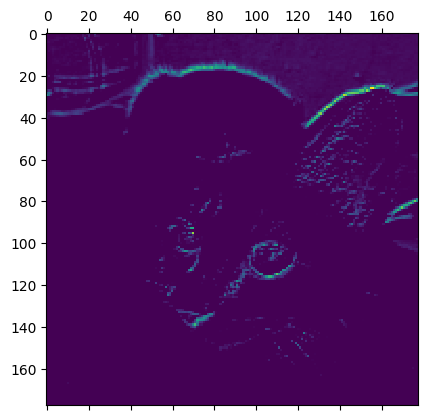

In [ ]:
#다섯 번째 채널 시각화하기

import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")  #원본모델 첫번째층 활성화중에서 여섯번째 채널 그리기
plt.show()

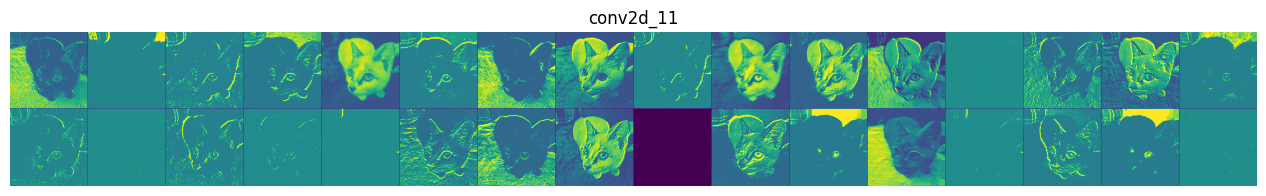

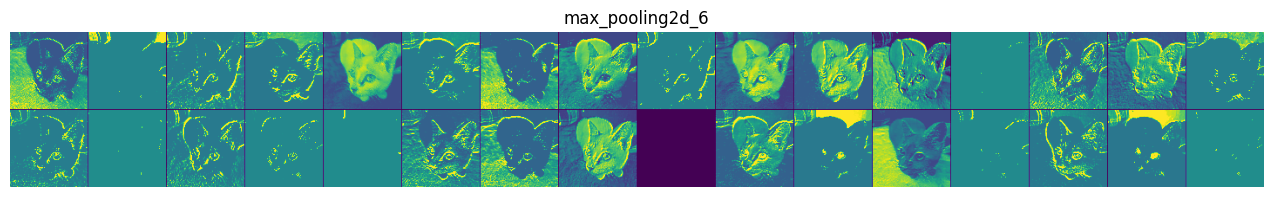

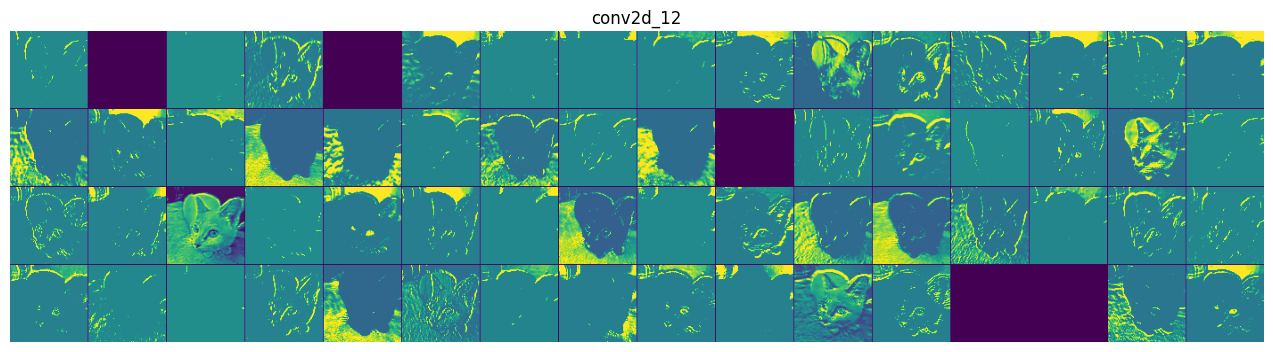

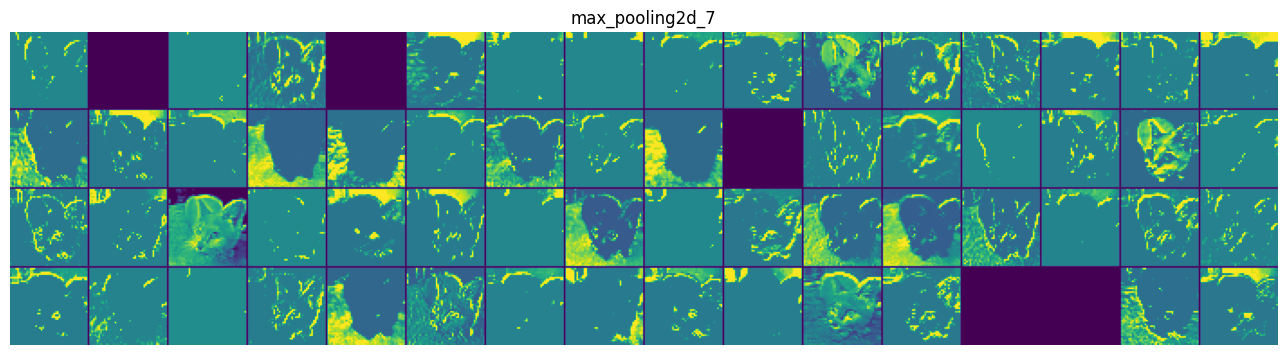

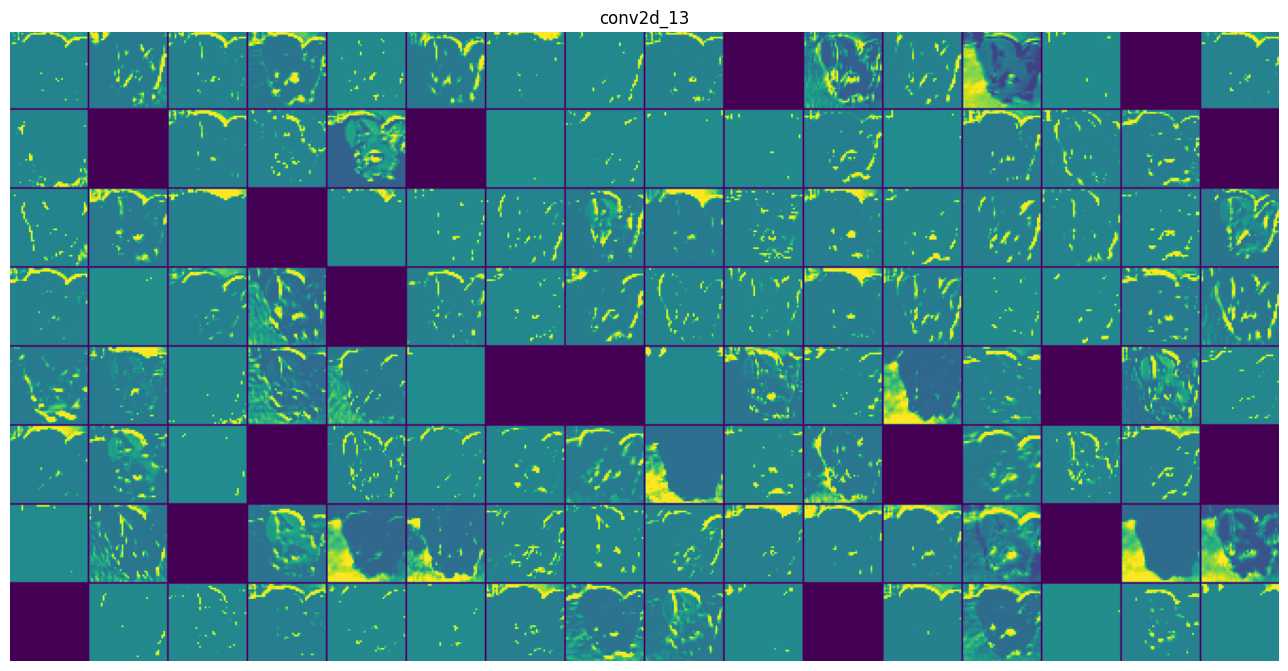

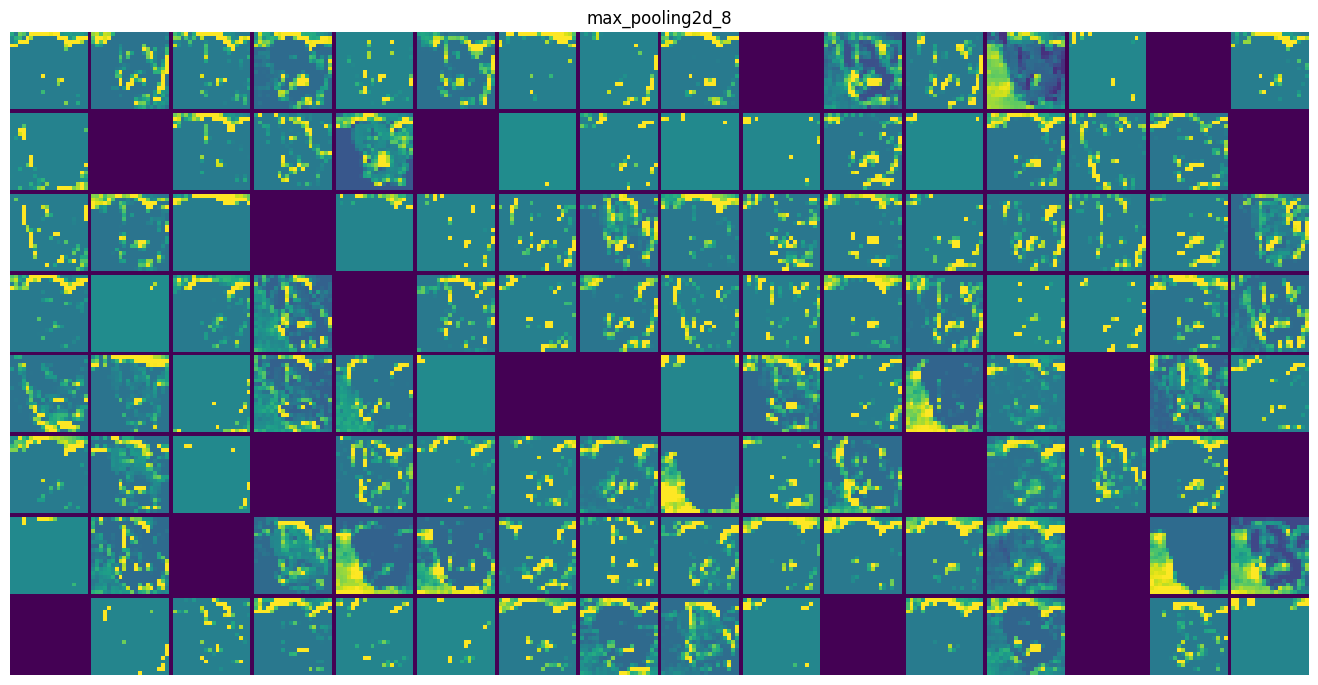

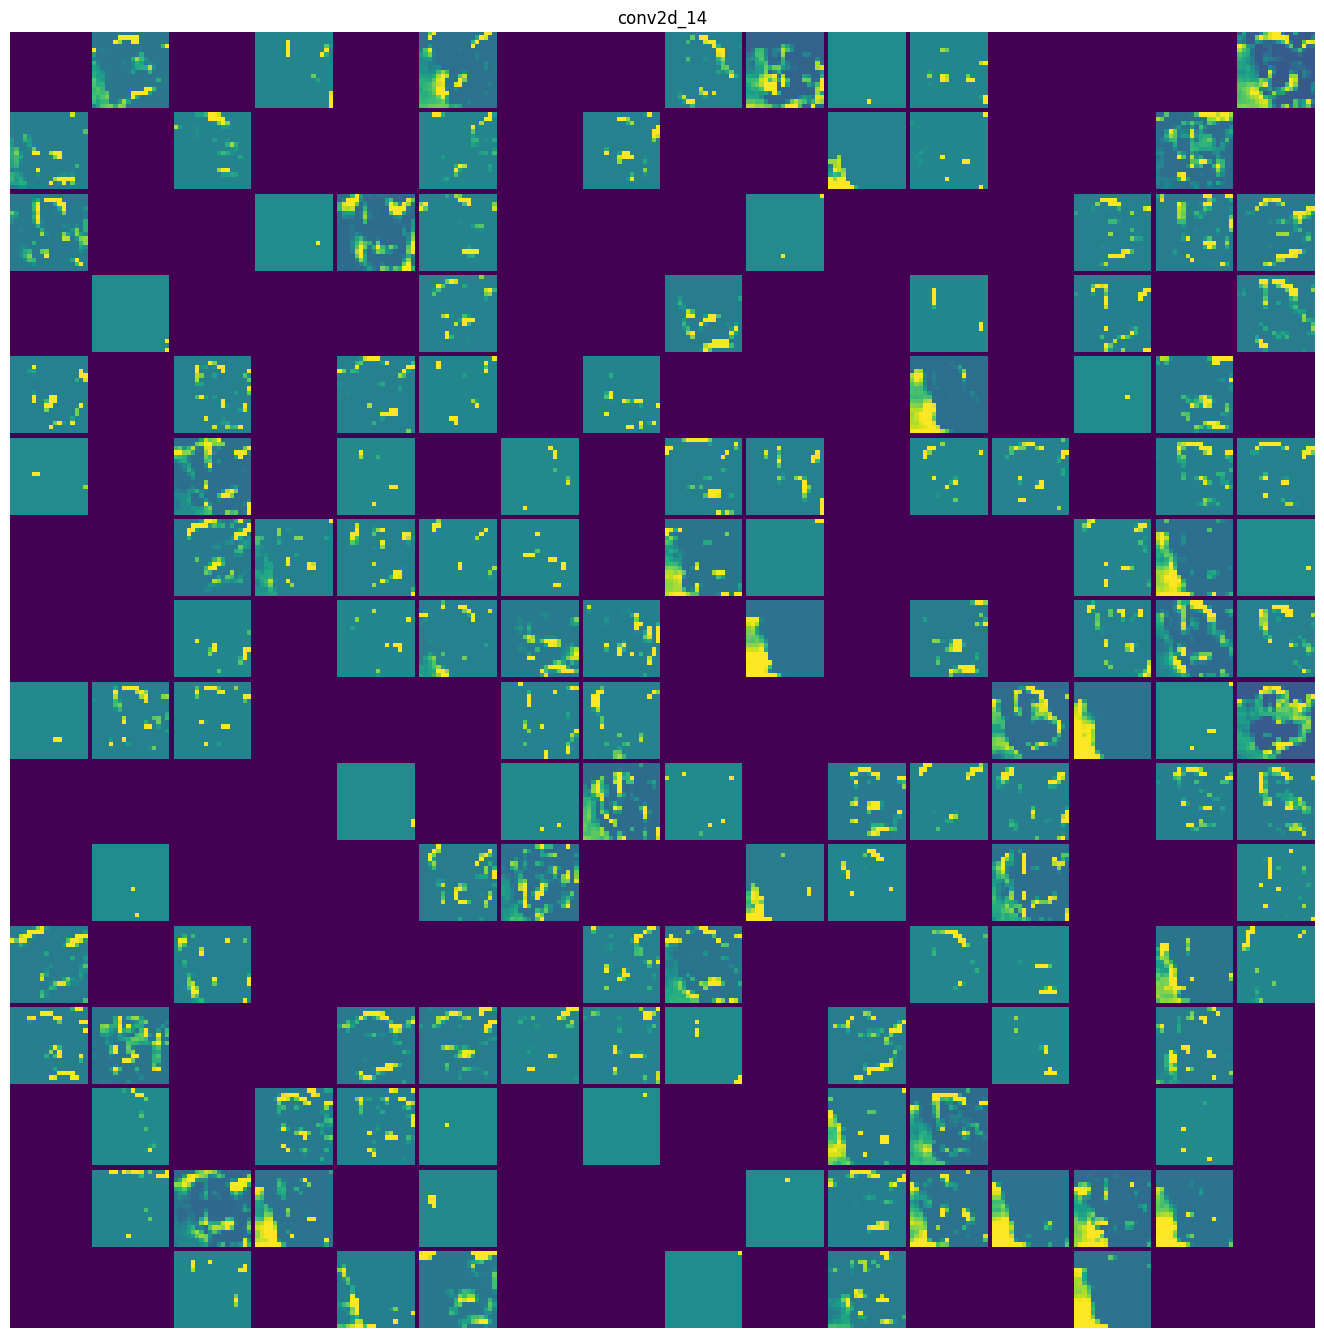

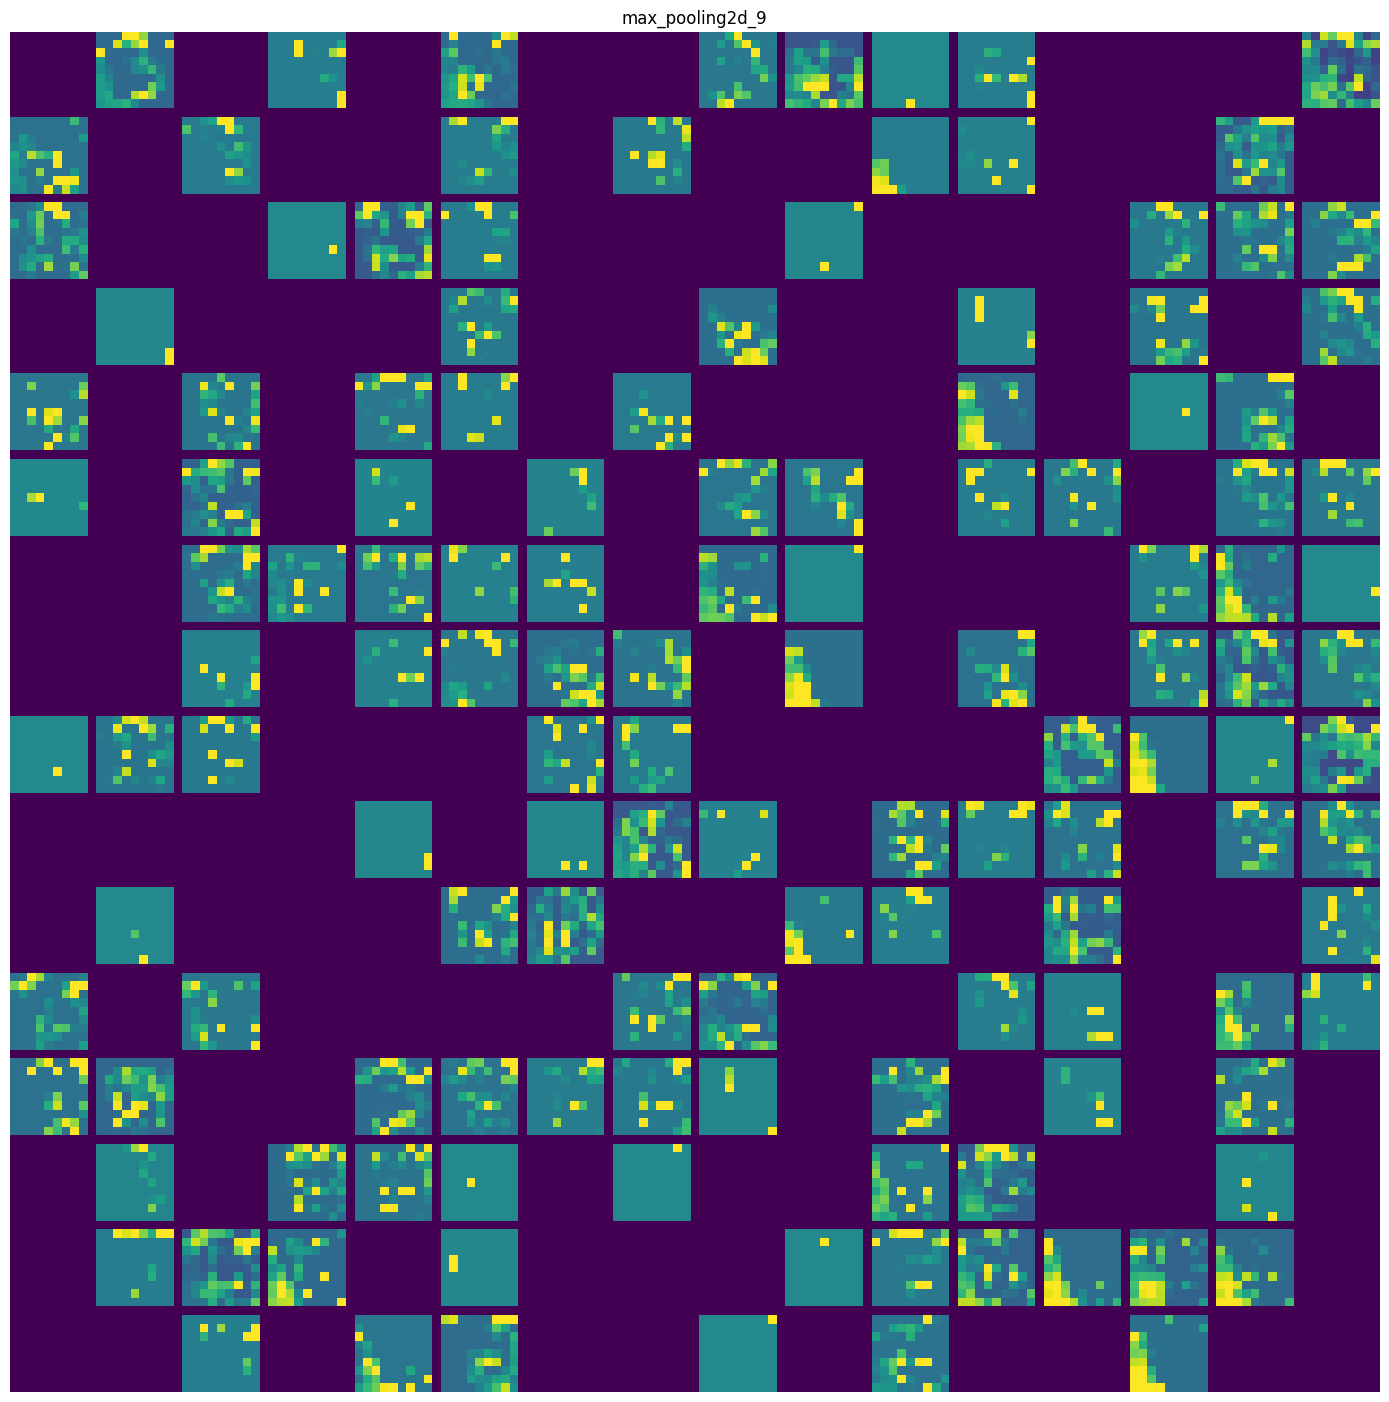

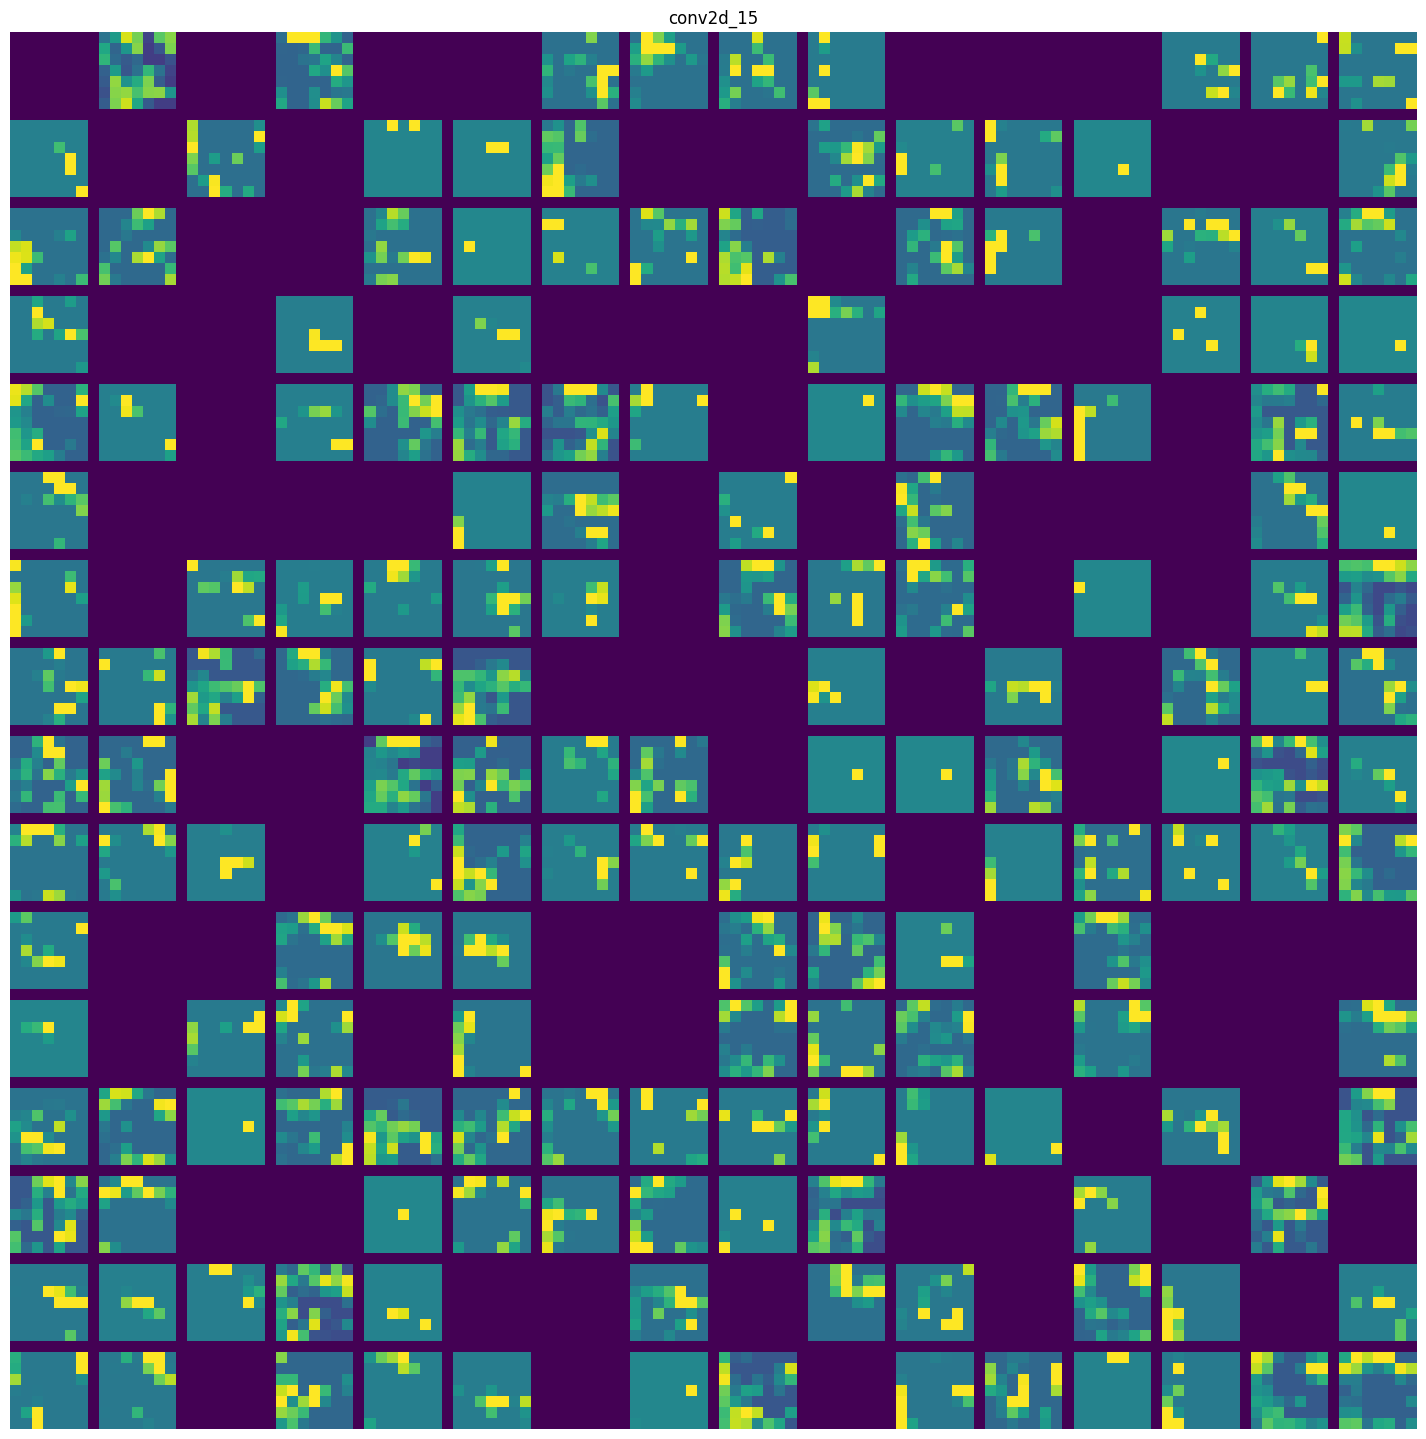

In [ ]:
#모든 층의 활성화에 있는 전체 채널 시각화하기

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")